Library yang digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

load dataset

In [2]:
df = pd.read_csv("data_balita 0-5 gaharu.csv")
df

,No,Nama,Gender,Usia (bulan),TB (cm),BB (kg),BB/U,Z-Score BB/U,BB/TB,Z-Score BB/TB,TB/U,Z-Score TB/U,Perkembangan Anak,Pola Makan,Lingkungan,Imunisasi Dasar,pendapatan keluarga,Hasil
0,1,M Irsan,Laki-laki,0,47.0,3.0,Normal,-0.89,Gizi Baik,0.85,Normal,-1.98,Sehat,Baik,Aman,Tidak Lengkap,Menengah,Tidak Berisiko
1,2,Naya Queenza,Perempuan,1,55.0,4.5,Normal,-0.43,Gizi Baik,-0.12,Normal,-0.37,Normal,Baik,Aman,Tidak Lengkap,Menengah,Tidak Berisiko
2,3,Arkhan Hafiz Priatna,Laki-laki,2,60.0,5.8,Normal,0.20,Gizi Baik,-0.39,Normal,0.62,Sehat,Baik,Aman,Tidak Lengkap,Menengah,Tidak Berisiko
3,4,Azka Kiya,Laki-laki,2,59.0,4.8,Kurang,-2.29,Gizi Kurang,-2.13,Normal,-1.09,Normal,Kurang,Aman,Tidak Lengkap,Menengah,Hampir Berisiko
4,5,Rafaeza,Laki-laki,2,61.0,6.4,Normal,0.10,Gizi Baik,0.26,Normal,-0.11,Sehat,Baik,Aman,Tidak Lengkap,Menengah,Tidak Berisiko
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,Hazira Azalwa,Perempuan,60,107.7,16.0,Normal,-0.90,Gizi Baik,-1.08,Normal,-0.41,Sehat,Baik,Aman,Lengkap,Menengah,Tidak Berisiko
206,207,Ica,Perempuan,60,108.0,15.0,Normal,-1.34,Gizi Baik,-1.92,Normal,-0.28,Sehat,Baik,Aman,Lengkap,Tinggi,Tidak Berisiko
207,208,Rohani,Perempuan,60,108.6,16.9,Normal,-0.51,Gizi Baik,-0.77,Normal,-0.19,Sehat,Baik,Aman,Lengkap,Menengah,Tidak Berisiko
208,209,Sri Wahyu Astuti,Perempuan,60,107.0,17.0,Normal,-0.48,Gizi Baik,-0.30,Normal,-0.52,Sehat,Baik,Aman,Lengkap,Tinggi,Tidak Berisiko


In [3]:
df.drop(['No','Nama'], axis=1, inplace=True)

In [4]:
df.head()

,Gender,Usia (bulan),TB (cm),BB (kg),BB/U,Z-Score BB/U,BB/TB,Z-Score BB/TB,TB/U,Z-Score TB/U,Perkembangan Anak,Pola Makan,Lingkungan,Imunisasi Dasar,pendapatan keluarga,Hasil
0,Laki-laki,0,47.0,3.0,Normal,-0.89,Gizi Baik,0.85,Normal,-1.98,Sehat,Baik,Aman,Tidak Lengkap,Menengah,Tidak Berisiko
1,Perempuan,1,55.0,4.5,Normal,-0.43,Gizi Baik,-0.12,Normal,-0.37,Normal,Baik,Aman,Tidak Lengkap,Menengah,Tidak Berisiko
2,Laki-laki,2,60.0,5.8,Normal,0.20,Gizi Baik,-0.39,Normal,0.62,Sehat,Baik,Aman,Tidak Lengkap,Menengah,Tidak Berisiko
3,Laki-laki,2,59.0,4.8,Kurang,-2.29,Gizi Kurang,-2.13,Normal,-1.09,Normal,Kurang,Aman,Tidak Lengkap,Menengah,Hampir Berisiko
4,Laki-laki,2,61.0,6.4,Normal,0.10,Gizi Baik,0.26,Normal,-0.11,Sehat,Baik,Aman,Tidak Lengkap,Menengah,Tidak Berisiko


**PEMBERSIHAN**

In [5]:
df.isnull().sum()

Gender                 0
Usia (bulan)           0
TB (cm)                0
BB (kg)                0
BB/U                   0
Z-Score BB/U           0
BB/TB                  0
Z-Score BB/TB          0
TB/U                   0
Z-Score TB/U           0
Perkembangan Anak      0
Pola Makan             0
Lingkungan             0
Imunisasi Dasar        0
pendapatan keluarga    0
Hasil                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

**PROSES ENCODING**

In [7]:
df['Gender'] = df['Gender'].map({'Laki-laki': 0, 'Perempuan': 1})

df['BB/U'] = df['BB/U'].map({'Sangat Kurang': 0, 'Kurang': 1, 'Normal': 2, 'Berat Badan Lebih': 3})

df['BB/TB'] = df['BB/TB'].map({'Gizi Buruk': 0, 'Gizi Kurang': 1, 'Gizi Baik': 2, 'Gizi Lebih': 3, 'Obesitas': 4})

df['TB/U'] = df['TB/U'].map({'Sangat Pendek': 0, 'Pendek': 1, 'Normal': 2, 'Tinggi':3})

df['Perkembangan Anak'] = df['Perkembangan Anak'].map({'Menyimpang': 0, 'Normal': 1, 'Sehat': 2})

df['Pola Makan'] = df['Pola Makan'].map({'Baik': 0, 'Kurang': 1})

df['Lingkungan'] = df['Lingkungan'].map({'Aman': 0, 'Tidak Aman': 1})

df['Imunisasi Dasar'] = df['Imunisasi Dasar'].map({'Lengkap': 0, 'Tidak Lengkap': 1})

df['pendapatan keluarga'] = df['pendapatan keluarga'].map({'Rendah': 0, 'Menengah': 1, 'Tinggi': 2})

df['Hasil'] = df['Hasil'].map({'Tidak Berisiko': 0, 'Hampir Berisiko': 1, 'Berisiko': 2})

df

,Gender,Usia (bulan),TB (cm),BB (kg),BB/U,Z-Score BB/U,BB/TB,Z-Score BB/TB,TB/U,Z-Score TB/U,Perkembangan Anak,Pola Makan,Lingkungan,Imunisasi Dasar,pendapatan keluarga,Hasil
0,0,0,47.0,3.0,2,-0.89,2,0.85,2,-1.98,2,0,0,1,1,0
1,1,1,55.0,4.5,2,-0.43,2,-0.12,2,-0.37,1,0,0,1,1,0
2,0,2,60.0,5.8,2,0.20,2,-0.39,2,0.62,2,0,0,1,1,0
3,0,2,59.0,4.8,1,-2.29,1,-2.13,2,-1.09,1,1,0,1,1,1
4,0,2,61.0,6.4,2,0.10,2,0.26,2,-0.11,2,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1,60,107.7,16.0,2,-0.90,2,-1.08,2,-0.41,2,0,0,0,1,0
206,1,60,108.0,15.0,2,-1.34,2,-1.92,2,-0.28,2,0,0,0,2,0
207,1,60,108.6,16.9,2,-0.51,2,-0.77,2,-0.19,2,0,0,0,1,0
208,1,60,107.0,17.0,2,-0.48,2,-0.30,2,-0.52,2,0,0,0,2,0


## EXPLORATORY DATA ANALYSIS (EDA)

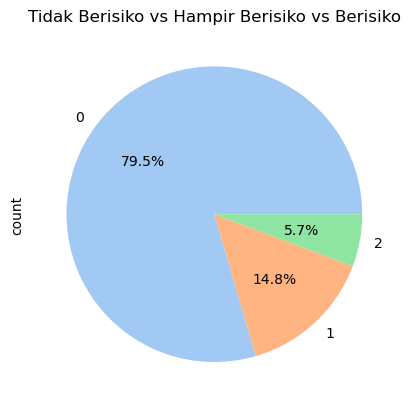

In [8]:
sn.set_palette('pastel')
df ['Hasil'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Tidak Berisiko vs Hampir Berisiko vs Berisiko')
plt.show()

In [9]:
X = df.drop(['Hasil'], axis=1) # Drop the 'Hasil' column
y = df['Hasil']

print("x : ", X.shape)
print("y : ", y.shape)

x :  (210, 15)
y :  (210,)


**Preparition Data**

In [10]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

**pembagian data 80:20**

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
def train_and_evaluate_svm(kernel):
    svm_model = SVC(kernel=kernel, C=1, decision_function_shape='ovo')
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Akurasi model dengan kernel: {kernel}, Akurasi: {accuracy * 100:.2f}%")
    return kernel, accuracy

# Uji semua kernel
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = [train_and_evaluate_svm(kernel) for kernel in kernels]

Akurasi model dengan kernel: linear, Akurasi: 95.24%
Akurasi model dengan kernel: poly, Akurasi: 95.24%
Akurasi model dengan kernel: rbf, Akurasi: 95.24%
Akurasi model dengan kernel: sigmoid, Akurasi: 88.10%


**Training Model Dan Test Akurasi**

In [13]:
# Fungsi untuk training dan evaluasi per kernel
def train_and_report_svm(kernel):
    print(f"\n=== Evaluasi Kernel: {kernel.upper()} ===")
    svm_model = SVC(kernel=kernel, C=1, decision_function_shape='ovo')
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Akurasi: {accuracy * 100:.2f}%")
    print("Classification Report:")
    classes_ = df['Hasil'].unique().astype(str)
    print(classification_report(y_test, y_pred, target_names=classes_))

# Evaluasi semua kernel
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    train_and_report_svm(kernel)


=== Evaluasi Kernel: LINEAR ===
Akurasi: 95.24%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.67      1.00      0.80         4
           2       1.00      0.67      0.80         3

    accuracy                           0.95        42
   macro avg       0.89      0.88      0.86        42
weighted avg       0.97      0.95      0.95        42


=== Evaluasi Kernel: POLY ===
Akurasi: 95.24%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.67      1.00      0.80         4
           2       1.00      0.67      0.80         3

    accuracy                           0.95        42
   macro avg       0.89      0.88      0.86        42
weighted avg       0.97      0.95      0.95        42


=== Evaluasi Kernel: RBF ===
Akurasi: 95.24%
Classification Report:
              precision    

In [14]:
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', C=1.0))
])

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores_linear = []

for train_index, test_index in skf.split(X, y): # Use original DataFrame X for splitting
    X_train_fold, X_val_fold = X[train_index], X[test_index]
    y_train_fold, y_val_fold = y[train_index], y[test_index]

    clf.fit(X_train_fold, y_train_fold)
    y_pred_fold = clf.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    accuracy_scores_linear.append(accuracy_fold)

print("\n=== SVM Linear Kernel ===")
for i, accuracy_fold in enumerate(accuracy_scores_linear):
    print(f"Fold {i+1} Accuracy: {accuracy_fold * 100:.2f}%")

print(f"Mean Accuracy: {sum(accuracy_scores_linear) / len(accuracy_scores_linear)* 100:.2f}%")
print(classification_report(y_val_fold, y_pred_fold))


=== SVM Linear Kernel ===
Fold 1 Accuracy: 95.24%
Fold 2 Accuracy: 90.48%
Fold 3 Accuracy: 100.00%
Fold 4 Accuracy: 100.00%
Fold 5 Accuracy: 100.00%
Fold 6 Accuracy: 100.00%
Fold 7 Accuracy: 100.00%
Fold 8 Accuracy: 100.00%
Fold 9 Accuracy: 100.00%
Fold 10 Accuracy: 95.24%
Mean Accuracy: 98.10%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.98      0.89      0.92        21
weighted avg       0.96      0.95      0.95        21



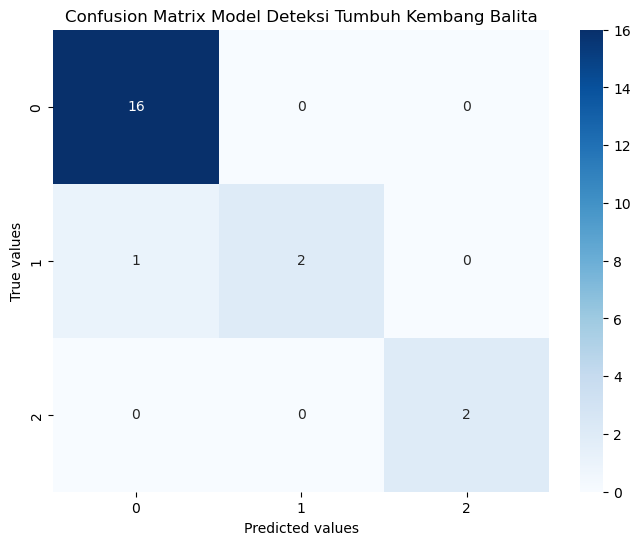

In [15]:
# Visualisasi Confusion Matrix
cm = confusion_matrix(y_val_fold, y_pred_fold)

plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix Model Deteksi Tumbuh Kembang Balita')
plt.show()


In [16]:
new_data = {'Gender': [1],
    'Usia (bulan)': [18],
    'TB (cm)': [74],
    'BB (kg)': [8.5],
    'BB/U': [0],
    'BB/TB': [1],
    'TB/U': [0],
    'Z-Score BB/U': [-1.7],
    'Z-Score BB/TB': [-2.3],
    'Z-Score TB/U': [-1.8],
    'Perkembangan Anak': [1],
    'Pola Makan': [1],
    'Lingkungan': [0],
    'Imunisasi Dasar': [1],
    'pendapatan keluarga': [1]}

new_data = pd.DataFrame(new_data)
new_data

,Gender,Usia (bulan),TB (cm),BB (kg),BB/U,BB/TB,TB/U,Z-Score BB/U,Z-Score BB/TB,Z-Score TB/U,Perkembangan Anak,Pola Makan,Lingkungan,Imunisasi Dasar,pendapatan keluarga
0,1,18,74,8.5,0,1,0,-1.7,-2.3,-1.8,1,1,0,1,1


In [17]:
# Get the original column names from your DataFrame 'df'
original_columns = df.columns.tolist()
# Remove the 'Hasil' column as it is not in your new_data
original_columns.remove('Hasil')

new_data = new_data[original_columns]

# Now you can safely scale the new data
scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print("Hasil Klasifikasi : ", y_pred_new)

Hasil Klasifikasi :  [1]
